# Accessing Argo data by date using Argopy

Import the usual suspects:

In [1]:
import xarray as xr
xr.set_options(display_style="html", display_expand_attrs=False);
from matplotlib import pyplot as plt
plt.style.use('default')
import cartopy
import cartopy.crs as ccrs
import argopy

Import argopy and set-up a data fetcher:

In [2]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(src='argovis', parallel=True)
argo_loader

<datafetcher.argovis> 'No access point initialised'
Available access points: float, profile, region
Performances: cache=False, parallel=True
User mode: standard
Dataset: phy

You can load profiles for a specific date (and domain) using the ``region`` access point:

In [3]:
argo_loader.region([-180, 180, -90, 90, 0, 5000, '2020-11-11', '2020-11-12']).load()
argo_loader

/home/mayorga/miniconda3/envs/AOS/lib/python3.9/site-packages/argopy/data_fetchers/argovis_data.py:326: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['TIME'] = ds['TIME'].astype(np.datetime64)


<datafetcher.argovis>
Name: Argovis Argo data fetcher for a space/time region
API: https://argovisbeta02.colorado.edu
Domain: [x=-180.00/180.00; y=-90.00/90 ... 00.0; t=2020-11-11/2020-11-12]
Performances: cache=False, parallel=True
User mode: standard
Dataset: phy

In [4]:
apDS = argo_loader.data
apDS

<xarray.Dataset>
Dimensions:          (N_POINTS: 282522)
Coordinates:
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 ... 282518 282519 282520 282521
    TIME             (N_POINTS) datetime64[ns] 2020-11-11T00:08:20 ... 2020-1...
    LATITUDE         (N_POINTS) float64 35.14 35.14 35.14 ... -15.29 -15.29
    LONGITUDE        (N_POINTS) float64 15.69 15.69 15.69 ... -135.0 -135.0
Data variables:
    CYCLE_NUMBER     (N_POINTS) float64 103.0 103.0 103.0 ... 189.0 189.0 189.0
    DATA_MODE        (N_POINTS) object 'R' 'R' 'R' 'R' 'R' ... 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) float64 6.904e+06 6.904e+06 ... 5.902e+06
    POSITION_QC      (N_POINTS) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    PRES             (N_POINTS) float64 2.9 3.9 5.1 ... 1.124e+03 1.126e+03
    PSAL             (N_POINTS) float64 38.03 38.03 38.03 ... 34.53 34.53 34.53
    TEMP             (N_POINTS) float64 22.01 22.02 22.01 ... 3.764 3.752 3.74
    TIME_QC          (N_POINTS) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes: (7)

(<Figure size 900x540 with 1 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

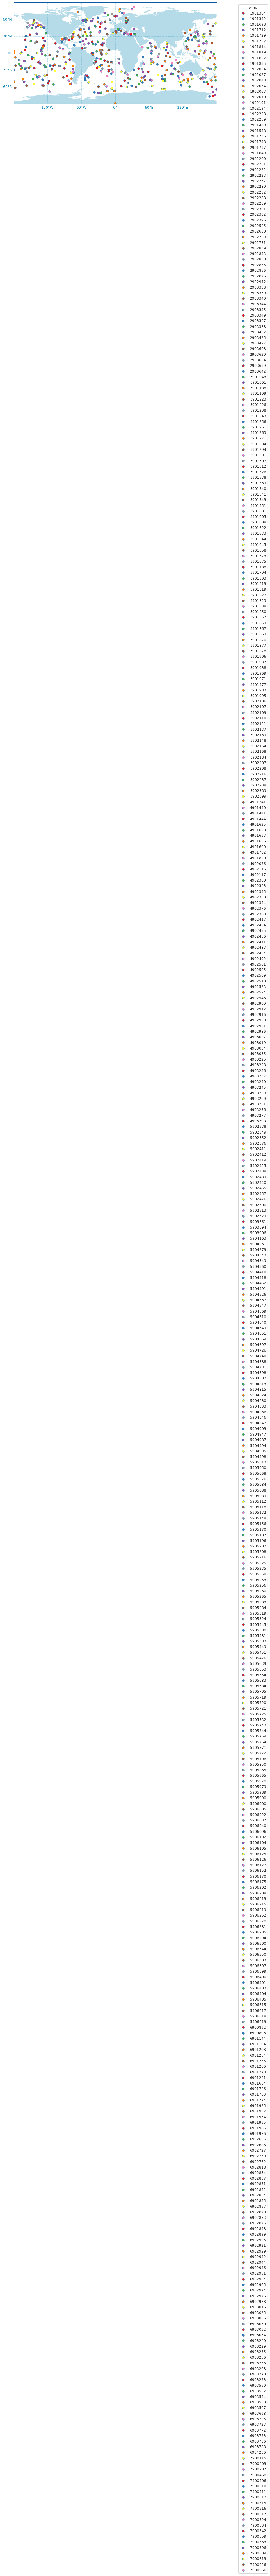

In [5]:
argo_loader.plot('trajectory')

We can look at the upper 10db temperature values:

In [6]:
temp = apDS.where(apDS['PRES']<10)['TEMP']
temp

<xarray.DataArray 'TEMP' (N_POINTS: 282522)>
array([22.014, 22.017, 22.012, ...,    nan,    nan,    nan])
Coordinates:
  * N_POINTS   (N_POINTS) int64 0 1 2 3 4 ... 282517 282518 282519 282520 282521
    TIME       (N_POINTS) datetime64[ns] 2020-11-11T00:08:20 ... 2020-11-11T2...
    LATITUDE   (N_POINTS) float64 35.14 35.14 35.14 ... -15.29 -15.29 -15.29
    LONGITUDE  (N_POINTS) float64 15.69 15.69 15.69 ... -135.0 -135.0 -135.0
Attributes: (7)

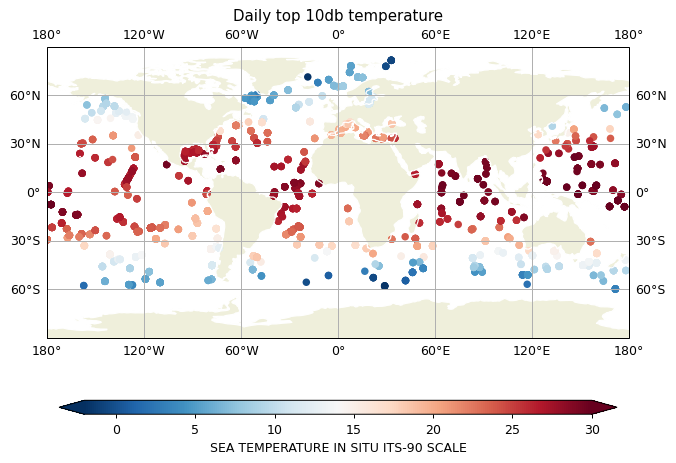

In [7]:
fig, ax = plt.subplots(**{"figsize": (10, 6), "dpi": 90}, subplot_kw={"projection": ccrs.PlateCarree()})
# argopy.plotters.latlongrid(ax)
# AttributeError: module 'argopy' has no attribute 'plotters'
# ax.add_feature(argopy.plotters.land_feature, edgecolor="black")
cs = ax.scatter(x=temp['LONGITUDE'], y=temp['LATITUDE'], c=temp, cmap="RdBu_r",vmin=-2, vmax=30, edgecolor='none')
cbar = fig.colorbar(cs, ax=ax, extend='both', orientation='horizontal', shrink=.8, aspect=40)

# Added these 3 to replace the argopy.plotters failures, above
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='white')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False);

cbar.set_label(temp.attrs['long_name'])
ax.set_title('Daily top 10db temperature');